In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import arviz as az
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
%config InlineBackend.figure_format = 'retina'

RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)

az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 300

In [3]:
df = pd.read_csv("../data/penguins.csv")
df.dropna(inplace=True)

In [4]:
df.describe(include="all")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [5]:
df.describe(include="object")

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [6]:
df["bill_depth_mm"].mean()

17.164864864864867

In [7]:
df["bill_length_mm"].std(ddof=1)

5.46866834264756

In [8]:
df["bill_length_mm"].idxmax()

185

In [9]:
df["species"].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [11]:
print(df["species"].value_counts(normalize=True))

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64


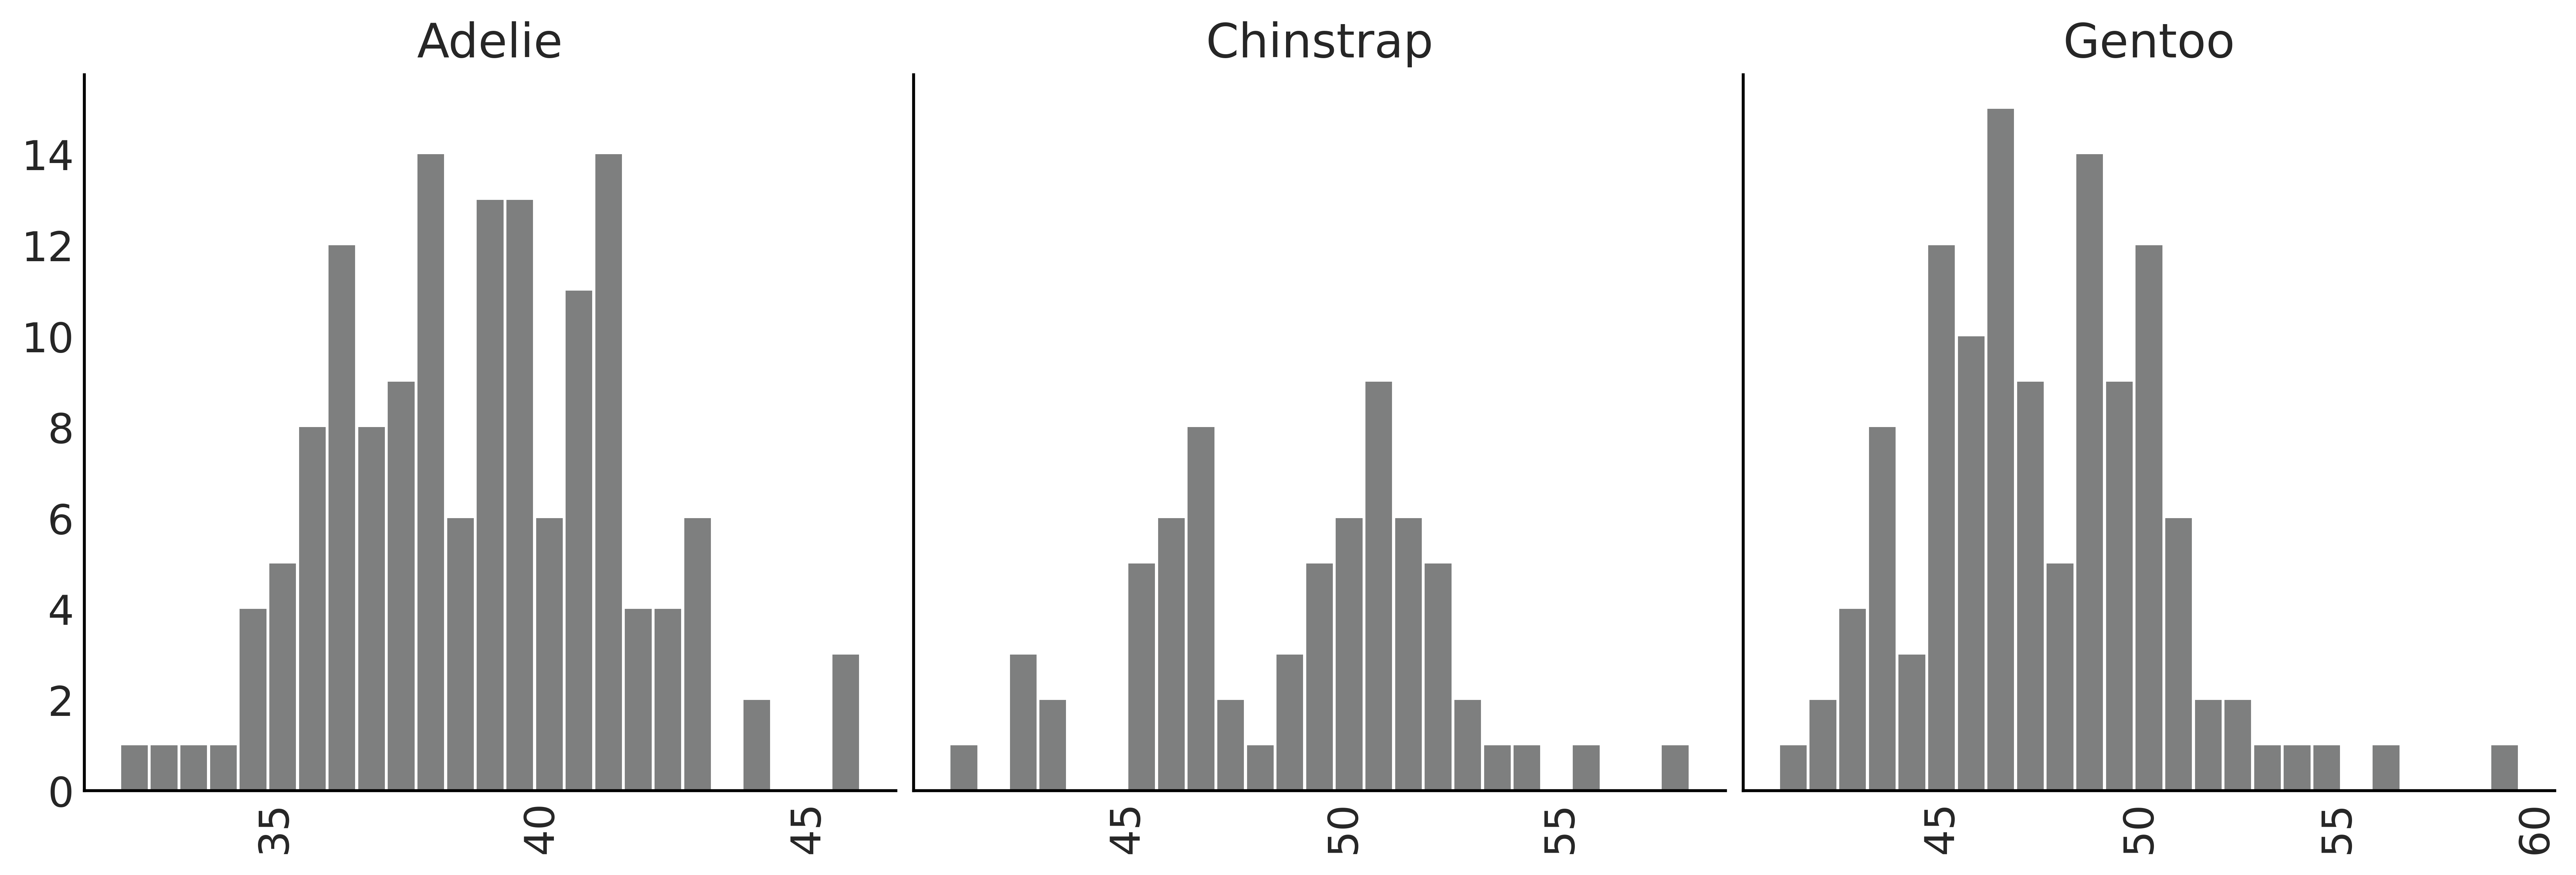

In [12]:
_ = df.hist(
    column="bill_length_mm",
    by=["species"],
    bins=25,
    color="C2",
    figsize=(12, 4),
    layout=(1, 3),
    zorder=2,
    sharey=True,
    rwidth=0.9,
)

In [13]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [14]:
# List of summary statistics functions
summary_stats = [np.min, np.median, np.mean, np.std, np.max]

# Calculate summary statistics for numeric columns using aggregate
result = df[
    ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
].aggregate(summary_stats)

print(result)

        bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
min          32.100000      13.100000         172.000000  2700.000000
median       44.500000      17.300000         197.000000  4050.000000
mean         43.992793      17.164865         200.966967  4207.057057
std           5.468668       1.969235          14.015765   805.215802
max          59.600000      21.500000         231.000000  6300.000000


In [15]:
grouped = df["body_mass_g"].groupby(df["species"])

In [16]:
grouped.mean()

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64

In [17]:
df.groupby(["island", "species", "sex"]).size()

island     species    sex   
Biscoe     Adelie     female    22
                      male      22
           Gentoo     female    58
                      male      61
Dream      Adelie     female    27
                      male      28
           Chinstrap  female    34
                      male      34
Torgersen  Adelie     female    24
                      male      23
dtype: int64

In [18]:
summary_stats = [np.mean, np.std]
# Group by "species" and calculate summary statistics for numeric columns
result = df.groupby("species").agg(
    {col: summary_stats for col in df.columns if pd.api.types.is_numeric_dtype(df[col])}
)

print(result)

          bill_length_mm           bill_depth_mm           flipper_length_mm  \
                    mean       std          mean       std              mean   
species                                                                        
Adelie         38.823973  2.662597     18.347260  1.219338        190.102740   
Chinstrap      48.833824  3.339256     18.420588  1.135395        195.823529   
Gentoo         47.568067  3.106116     14.996639  0.985998        217.235294   

                     body_mass_g                     year            
                std         mean         std         mean       std  
species                                                              
Adelie     6.521825  3706.164384  458.620135  2008.054795  0.811816  
Chinstrap  7.131894  3733.088235  384.335081  2007.970588  0.863360  
Gentoo     6.585431  5092.436975  501.476154  2008.067227  0.789025  


In [19]:
df.groupby(["island", "species"])[["body_mass_g", "flipper_length_mm"]].mean()

body_mass_g  flipper_length_mm
island    species                                  
Biscoe    Adelie     3709.659091         188.795455
          Gentoo     5092.436975         217.235294
Dream     Adelie     3701.363636         189.927273
          Chinstrap  3733.088235         195.823529
Torgersen Adelie     3708.510638         191.531915

In [20]:
df.groupby(["island", "species"])[["body_mass_g", "flipper_length_mm"]].std(ddof=1)

body_mass_g  flipper_length_mm
island    species                                  
Biscoe    Adelie      487.733722           6.729247
          Gentoo      501.476154           6.585431
Dream     Adelie      448.774519           6.480325
          Chinstrap   384.335081           7.131894
Torgersen Adelie      451.846351           6.220062

In [21]:
summary_stats = (
    df.loc[:, ["island", "species", "body_mass_g", "flipper_length_mm"]]
    .groupby(["island", "species"])
    .aggregate(["mean", "std", "count"])
)
summary_stats

body_mass_g                   flipper_length_mm  \
                            mean         std count              mean   
island    species                                                      
Biscoe    Adelie     3709.659091  487.733722    44        188.795455   
          Gentoo     5092.436975  501.476154   119        217.235294   
Dream     Adelie     3701.363636  448.774519    55        189.927273   
          Chinstrap  3733.088235  384.335081    68        195.823529   
Torgersen Adelie     3708.510638  451.846351    47        191.531915   

                                     
                          std count  
island    species                    
Biscoe    Adelie     6.729247    44  
          Gentoo     6.585431   119  
Dream     Adelie     6.480325    55  
          Chinstrap  7.131894    68  
Torgersen Adelie     6.220062    47

In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sun Sep 17 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

pandas    : 2.0.3
numpy     : 1.25.2
arviz     : 0.16.0
scipy     : 1.10.1
matplotlib: 3.7.2

Watermark: 2.4.3

